**CODEALPHA TASK 2: CAR PRICE PREDICTION**

**Student ID: CA/DF1/22584**

**Name: Sunit Modak**

In [17]:
# Importing All Essential Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [18]:
# Replace 'cars.csv' with your dataset path
df = pd.read_csv('car data.csv')

In [19]:
# Preview data
print(df.head())
print(df.info())
print(df.describe())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

In [20]:
df = df.dropna()  # simplest approach
# Or fill with mean/median for numerical columns
# df['horsepower'].fillna(df['horsepower'].median(), inplace=True)


In [21]:
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']
numerical_features = ['Year', 'Present_Price', 'Driven_kms', 'Owner']

# Column Transformer for pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [22]:
X = df[numerical_features + categorical_features]
y = df['Selling_Price']  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression RMSE: 1.87
Linear Regression R^2 Score: 0.85
Random Forest RMSE: 0.91
Random Forest R^2 Score: 0.96


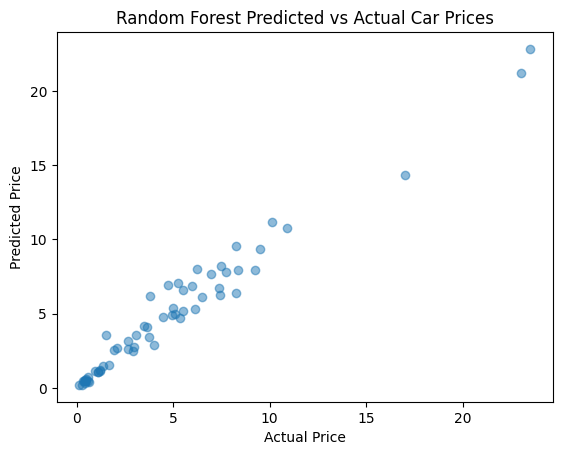

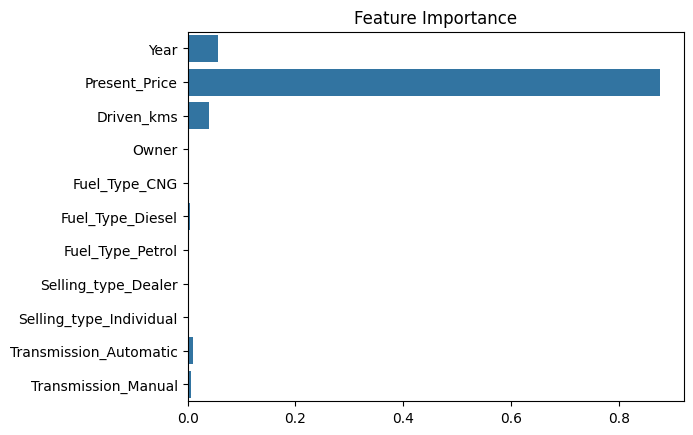

In [23]:
def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} RMSE: {rmse:.2f}')
    print(f'{model_name} R^2 Score: {r2:.2f}')

evaluate(y_test, y_pred_lr, 'Linear Regression')
evaluate(y_test, y_pred_rf, 'Random Forest')
# Predicted vs Actual Prices
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest Predicted vs Actual Car Prices')
plt.show()

# Feature Importance for Random Forest
importances = rf_pipeline.named_steps['regressor'].feature_importances_
feature_names = rf_pipeline.named_steps['preprocessor'].transformers_[0][2] + \
                list(rf_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())

sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()

In [24]:
# Linear Regression Pipeline
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

In [25]:
# Linear Regression Pipeline
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)


Linear Regression RMSE: 1.87
Linear Regression R^2 Score: 0.85
Random Forest RMSE: 0.91
Random Forest R^2 Score: 0.96


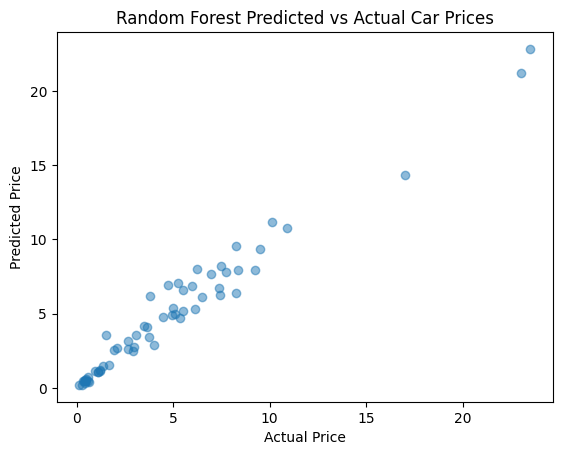

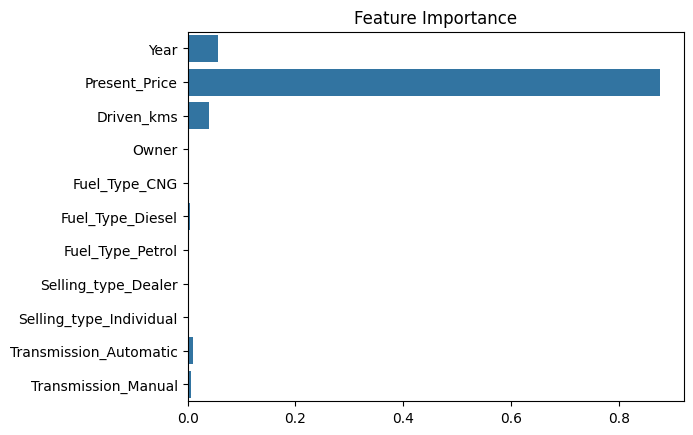

In [26]:
def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} RMSE: {rmse:.2f}')
    print(f'{model_name} R^2 Score: {r2:.2f}')

evaluate(y_test, y_pred_lr, 'Linear Regression')
evaluate(y_test, y_pred_rf, 'Random Forest')
# Predicted vs Actual Prices
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest Predicted vs Actual Car Prices')
plt.show()

# Feature Importance for Random Forest
importances = rf_pipeline.named_steps['regressor'].feature_importances_
feature_names = rf_pipeline.named_steps['preprocessor'].transformers_[0][2] + \
                list(rf_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())

sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()
